# pycricketpred

This example usage showcases how to utilize the `pycricketpred` library in a project for cricket match prediction. 

We'll walk through each step with detailed explanations.

## Installation

In [1]:
import pycricketpred

#displays the current version of the library you're using.

print(pycricketpred.__version__)

0.1.0


In [2]:
# import the different modules
## general data reading and manipulation tasks
from pycricketpred.data_wrangling import *  

#cleaning and preparing the cricket data
from pycricketpred.data_cleaning import *

# visualizations for exploratory data analysis
from pycricketpred.eda import *

# building, training and evalutating LogisticRegression models.
from pycricketpred.modelling import *


## Usage

### 1.1 Data Wrangling Module

Our `data_wrangling modules` performs a large variety of wrangling tasks on ball-by-ball data available in json format. The examples below will show the analysis process, although one a much smaller data sample.

#### 1.1.1 Process a Zipped Archive containing ball-by-ball data

The function `process_cricket_jsons` takes in a zipped archive with json files containing our ball-by-ball data and converts it into a dataframe, and saves it in the parquet format. The function takes in two inputs - a file path pointing to the zipped archive and a file path to save all the parquet files.

In [3]:
# read sample json data from a zipped archive and save it a folder in the parquet format
process_cricket_jsons('data/test_zips.zip', 'data/example_parquet')

Progress: 33.33%
Progress: 66.67%
Progress: 100.00%


#### 1.1.2 Wrangle the data into a suitable format

The `process_cricket_jsons` function contains two other functions wrapped in it - `parse_cricket_json` and `add_columns`, both of which transform the data into a suitable dataframe format. 

The `parse_cricket_json` function takes in the an opened json file and wrangles it into a dataframe as shown below.


In [4]:
with open('data/211028.json') as file_content:
    df = parse_cricket_json(file_content, '211028')
df

,game_id,season,team,over,batter,batter_id,bowler,bowler_id,non_striker,non_striker_id,...,byes,wicket,player_out,player_out_id,fielders_name,fielders_id,wicket_type,runs_batter,runs_extras,runs_total
0,211028,2005,England,0,ME Trescothick,ea42ddb9,B Lee,dd09ff8e,GO Jones,2e929b99,...,0,0,,,,,,0,0,0
1,211028,2005,England,0,ME Trescothick,ea42ddb9,B Lee,dd09ff8e,GO Jones,2e929b99,...,0,0,,,,,,1,0,1
2,211028,2005,England,0,GO Jones,2e929b99,B Lee,dd09ff8e,ME Trescothick,ea42ddb9,...,0,0,,,,,,0,0,0
3,211028,2005,England,0,GO Jones,2e929b99,B Lee,dd09ff8e,ME Trescothick,ea42ddb9,...,0,0,,,,,,0,0,0
4,211028,2005,England,0,GO Jones,2e929b99,B Lee,dd09ff8e,ME Trescothick,ea42ddb9,...,0,0,,,,,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211028,2005,Australia,13,GD McGrath,ee7d0c82,A Flintoff,ddc0828d,MS Kasprowicz,8d0ea930,...,0,0,,,,,,0,0,0
211,211028,2005,Australia,13,GD McGrath,ee7d0c82,A Flintoff,ddc0828d,MS Kasprowicz,8d0ea930,...,0,0,,,,,,1,0,1
212,211028,2005,Australia,14,GD McGrath,ee7d0c82,SJ Harmison,c16d2e28,MS Kasprowicz,8d0ea930,...,0,0,,,,,,0,0,0
213,211028,2005,Australia,14,GD McGrath,ee7d0c82,SJ Harmison,c16d2e28,MS Kasprowicz,8d0ea930,...,0,0,,,,,,0,0,0


The `add_columns` function adds necessary columns for our analysis, which are as follows:

1. `team_over` (Which over is being played which team: `str`),
2. `over_ball` (Which ball of the over is it: `str`),
3. `inning` (Which innings (1st or 2nd): `int`),
4. `runs_cumulative` (Runs scored so far in the inning: `int`),
5. `powerplay` (Is it a powerplay or not: `int`)

An example can be seen below

In [5]:
df_cricket = add_columns(df)
df_cricket.head()

,game_id,season,team,over,batter,batter_id,bowler,bowler_id,non_striker,non_striker_id,...,fielders_id,wicket_type,runs_batter,runs_extras,runs_total,team_over,over_ball,inning,runs_cumulative,powerplay
0,211028,2005,England,0,ME Trescothick,ea42ddb9,B Lee,dd09ff8e,GO Jones,2e929b99,...,,,0,0,0,England_0,1,1,0,1
1,211028,2005,England,0,ME Trescothick,ea42ddb9,B Lee,dd09ff8e,GO Jones,2e929b99,...,,,1,0,1,England_0,2,1,1,1
2,211028,2005,England,0,GO Jones,2e929b99,B Lee,dd09ff8e,ME Trescothick,ea42ddb9,...,,,0,0,0,England_0,3,1,1,1
3,211028,2005,England,0,GO Jones,2e929b99,B Lee,dd09ff8e,ME Trescothick,ea42ddb9,...,,,0,0,0,England_0,4,1,1,1
4,211028,2005,England,0,GO Jones,2e929b99,B Lee,dd09ff8e,ME Trescothick,ea42ddb9,...,,,0,0,0,England_0,5,1,1,1


#### 1.1.3 Go through the data to find majority dtypes and apply it

To determine the majority type of each column in the dataframe and create a mapping dictionary, we have the function `determine_majority_dtypes`, which takes in a list of parquet files and an input folder. This can be used to later apply the mapping to a dataframe, to ensure consistency across data points. The function to apply the mapping is `apply_dtypes_and_concatenate` which takes in the same inputs as above, and the mapping dictionary generated.

In [6]:
majority_mapping = determine_majority_dtypes(['211048.parquet', '211028.parquet', '222678.parquet'], 'data/example_parquet')
majority_mapping

{'game_id': 'object',
 'season': 'object',
 'team': 'object',
 'over': 'int64',
 'batter': 'object',
 'batter_id': 'object',
 'bowler': 'object',
 'bowler_id': 'object',
 'non_striker': 'object',
 'non_striker_id': 'object',
 'wides': 'int64',
 'noballs': 'int64',
 'legbyes': 'int64',
 'byes': 'int64',
 'wicket': 'int64',
 'player_out': 'object',
 'player_out_id': 'object',
 'fielders_name': 'object',
 'fielders_id': 'object',
 'wicket_type': 'object',
 'runs_batter': 'int64',
 'runs_extras': 'int64',
 'runs_total': 'int64',
 'team_over': 'object',
 'over_ball': 'int64',
 'inning': 'int64',
 'runs_cumulative': 'int64',
 'powerplay': 'int64'}

In [7]:
final_df = apply_dtypes_and_concatenate(['211048.parquet', '211028.parquet', '222678.parquet'], 'data/example_parquet', majority_mapping)
final_df.head()

,game_id,season,team,over,batter,batter_id,bowler,bowler_id,non_striker,non_striker_id,...,fielders_id,wicket_type,runs_batter,runs_extras,runs_total,team_over,over_ball,inning,runs_cumulative,powerplay
0,211048,2004/05,Australia,0,AC Gilchrist,2b6e6dec,DR Tuffey,43936951,MJ Clarke,f842c2cf,...,,,0,1,1,Australia_0,1,1,1,1
1,211048,2004/05,Australia,0,AC Gilchrist,2b6e6dec,DR Tuffey,43936951,MJ Clarke,f842c2cf,...,,,0,1,1,Australia_0,2,1,2,1
2,211048,2004/05,Australia,0,MJ Clarke,f842c2cf,DR Tuffey,43936951,AC Gilchrist,2b6e6dec,...,,,0,0,0,Australia_0,3,1,2,1
3,211048,2004/05,Australia,0,MJ Clarke,f842c2cf,DR Tuffey,43936951,AC Gilchrist,2b6e6dec,...,,,1,0,1,Australia_0,4,1,3,1
4,211048,2004/05,Australia,0,AC Gilchrist,2b6e6dec,DR Tuffey,43936951,MJ Clarke,f842c2cf,...,,,1,0,1,Australia_0,5,1,4,1


### 1.2 Data Cleaning Module

The data cleaning module helps perform repetitive data cleaning tasks. The functions in this module are `separate_columns` which separates the target variable and the predictor variables and `split_and_save_data` which splits the data into training and testing sets and saves the training data.

The function `split_and_save_data` has a default training size of 0.7 and saves the data automatically to the parent directory. This can be changed by editing the `train_size` and `save_table_path` arguments in the function respectively.

In [8]:
#Drop the ‘wicket‘ column from the DataFrame and separate it as the target variable.
X, y = separate_columns(final_df)
X.head(2)


,game_id,season,team,over,batter,batter_id,bowler,bowler_id,non_striker,non_striker_id,...,fielders_id,wicket_type,runs_batter,runs_extras,runs_total,team_over,over_ball,inning,runs_cumulative,powerplay
0,211048,2004/05,Australia,0,AC Gilchrist,2b6e6dec,DR Tuffey,43936951,MJ Clarke,f842c2cf,...,,,0,1,1,Australia_0,1,1,1,1
1,211048,2004/05,Australia,0,AC Gilchrist,2b6e6dec,DR Tuffey,43936951,MJ Clarke,f842c2cf,...,,,0,1,1,Australia_0,2,1,2,1


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: wicket, dtype: int64

In [10]:
X_train, X_test, y_train, y_test ,train_df = split_and_save_data(X, y, save_table_path = 'data/')
print("The shape of the original data is", X.shape)
print("The shape of the training data is", X_train.shape)

The shape of the original data is (693, 27)
The shape of the training data is (485, 27)


### 1.3 Data Visualization Modules

This module contains functions for repetitive visualizations that may be used with cricket data.

#### 1.3.1 Visualizing Distribution of variables

The function `vis_bar` created altair charts to visualize the distribution of variables in the dataframe. The desired `width` and `height` of the plot can be specified. A few examples are highlighted below. The argument `:N` can be added to the column to specify a categorical variable.

In [11]:
over = vis_bar(X_train, "over", 150, 150)
over

alt.Chart(...)

In [12]:
innings = vis_bar(X_train, "inning:N", 150, 150)
innings	

alt.Chart(...)

#### 1.3.2 Visualizing the distribution of wickets across different categories

The function `hist_chart` creates a distribution of wickets across different categories and saves it to a specified directory. The name of the chart can also be specified in the `chart_name` argument. This needs to be conducted on the entire dataset, including the `wicket` column. 

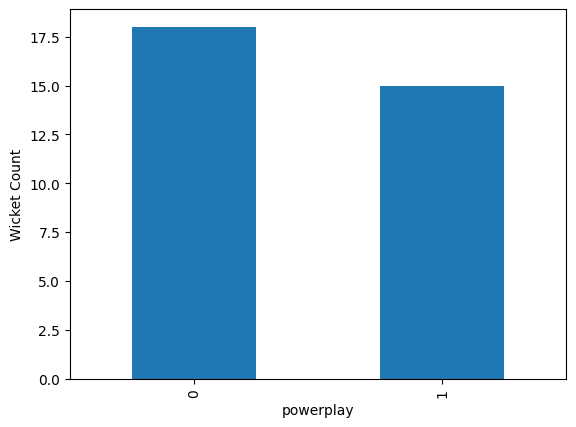

In [13]:
hist_chart(train_df, 'powerplay', 'chart1.png', save_path='images/')

### 1.4 Building, training and evaluate the Machine Learning models

The `modelling` module contains a wide range of functions to build, train and evaluate the logistic regression module using confusion matrices. 

#### 1.4.1 Preprocessing

The function `preprocessing` creates a one-hot encoder for categorical features and scaler for the numerical features. The function `transformer` creates a column transformer and applies it to the variables of interest.

In [14]:
# preprocessing performs one-hot encoding categorical features and feature scaling.
ohe, scaler = preprocessing()

# creates a combined transformer object for the coming training
ct = transformer(ohe, scaler)

#### 1.4.2 Model Building

The function `build_final_model` takes in the column transformer and the training data to build a `LogisticRegression` model.

In [20]:
#using the transformer object and data to build the  machine learning model 
final_pipe = build_final_model(ct, X_train, y_train)

#### 1.4.3 Model Evaluation

The `evaluate_model` function takes in the model trained and the test data, and returns the accuracy. It also generates and saves a confusion matrix to the filepath specified.

Model Score: 0.7355769230769231
Chart saved to: images/


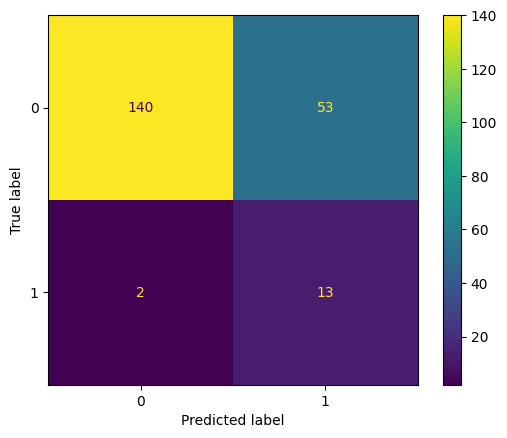

In [25]:
# assesses the performance of the model on the testing data
evaluate_model(final_pipe, X_test, y_test, save_image_path="images/")

## Summary

The `pycricketpred` library offers a comprehensive toolkit for cricket match prediction tasks. This walkthrough demonstrated its functionalities for data wrangling, visualization, and building machine learning models.

By following the steps outlined and exploring the library's capabilities further, valuable insights can be gained from cricket data and develop effective prediction models. We hope this package allows you to explore these interesting datasets further and get a better understanding of the game. 